In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

# Q2 Part-1

In [2]:
df = CircleDataset(10000).get()

In [3]:
df_noise = CircleDataset(10000).get(add_noise=True)

In [4]:
(df_noise == df).sum()

x               0
y               0
center_x    10000
center_y     5037
radius      10000
label        5037
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         10000 non-null  float64
 1   y         10000 non-null  float64
 2   center_x  10000 non-null  float64
 3   center_y  10000 non-null  float64
 4   radius    10000 non-null  float64
 5   label     10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [6]:
df_noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         10000 non-null  float64
 1   y         10000 non-null  float64
 2   center_x  10000 non-null  float64
 3   center_y  10000 non-null  float64
 4   radius    10000 non-null  float64
 5   label     10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [7]:
(np.abs((df['x']-df['center_x'])**2 + (df['y']-df['center_y'])**2 - 1) > 1e-15).sum()

0

In [8]:
df.head()

,x,y,center_x,center_y,radius,label
0,0.265138,3.964210,0.0,3.0,1.0,1.0
1,-0.998669,0.051568,0.0,0.0,1.0,0.0
2,0.937292,0.348544,0.0,0.0,1.0,0.0
3,-0.855990,2.483007,0.0,3.0,1.0,1.0
4,-0.827660,-0.561230,0.0,0.0,1.0,0.0


# Q2 Part-2


In [9]:
def plot_circle_dataset(data, xlim, ylim, plot_decision_boundary=False, model_weights=[],with_bias=True):
    fig = plt.figure(dpi=150)
    axes = fig.add_axes([0,0,1,1])

    df_label0 = data[data['label'] == 0]
    df_label1 = data[data['label'] == 1]

    axes.scatter(df_label0['x'], df_label0['y'], c='r', marker='.', label='Label 0 (red)', s=0.8);
    axes.scatter(df_label1['x'], df_label1['y'], c='b', marker='.', label='Label 1 (blue)', s=0.8);

    if plot_decision_boundary:
        x = np.random.uniform(low=xlim[0],high=xlim[1],size=1000)
        y = -1
        if with_bias:
            y = (-model_weights[2] - model_weights[0]*x) / model_weights[1]
        else:
            y = -model_weights[0]*x / model_weights[1]
        axes.plot(x,y,color='k',label='Decision Boundary')
    
    axes.grid(True)
    axes.legend()
    axes.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
    axes.spines['left'].set_position(('data',0))   # set position of y spine to y=0
    axes.spines['right'].set_color('none')
    axes.spines['top'].set_color('none')
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xlabel('X', loc='right', fontsize=18)
    axes.set_ylabel('Y', loc='top', fontsize=18)

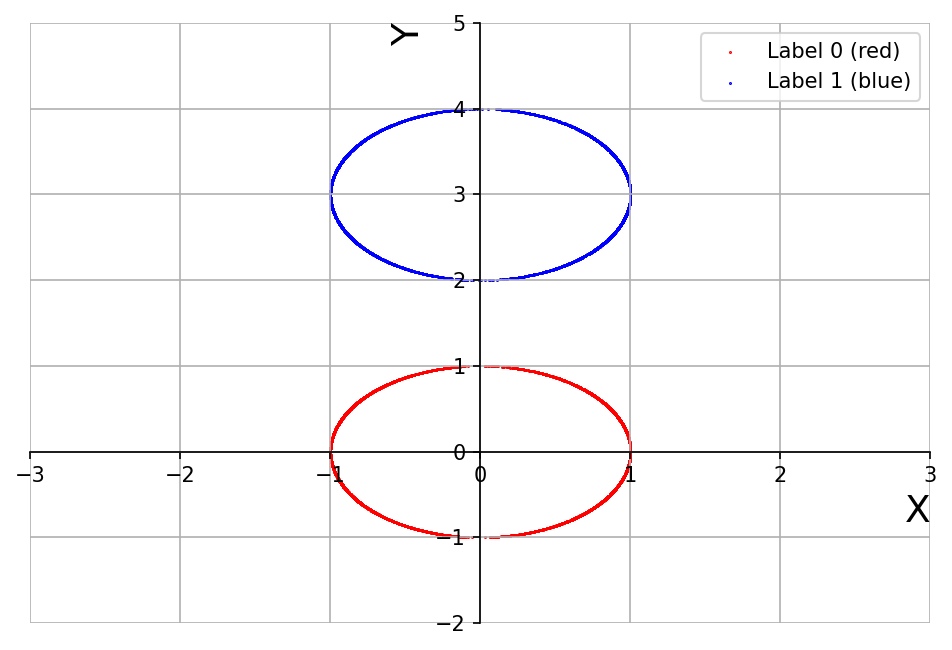

In [10]:
plot_circle_dataset(df, [-3,3], [-2,5])

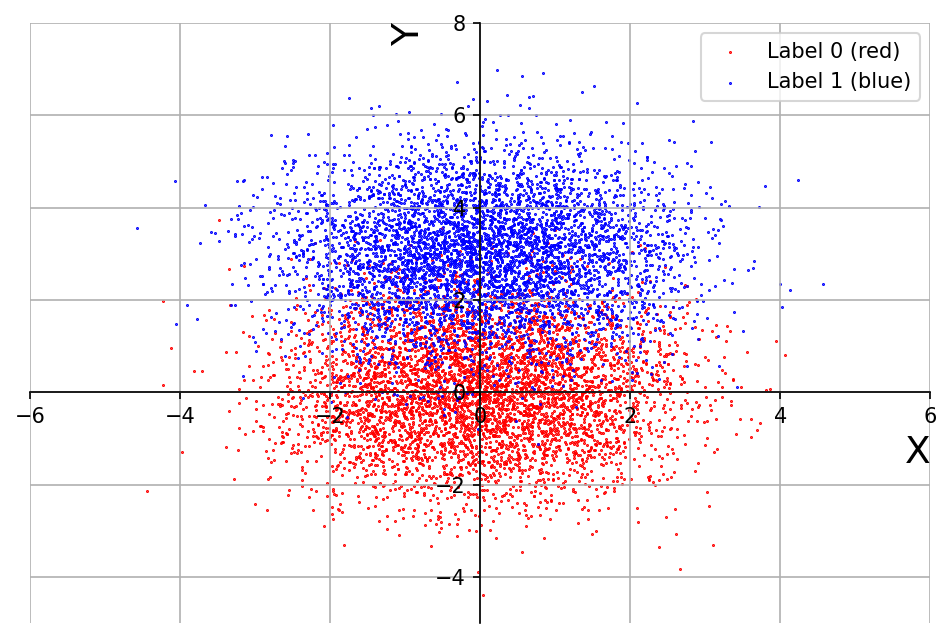

In [11]:
plot_circle_dataset(df_noise, [-6,6], [-5,8])

# Q2 Part-3

In [12]:
def apply_preceptron_on_circle_data(df_set: pd.DataFrame, partition_size, with_bias=True):
    x_train, y_train, x_test, y_test = split_circle_data_into_train_test(df_set, partition_size, with_bias)

    perceptron_model = Perceptron()
    perceptron_model.fit(x_train, y_train)

    y_pred = perceptron_model.predict(x_test)

    accuracy = perceptron_model.accuracy(x_test, y_test)
    # print(perceptron_model.weights)

    print(f'Accuracy in Prediction of Perceptron Leraning Algorithm:', accuracy)
    plot_circle_dataset(df_set, [-3,3], [-2,5], plot_decision_boundary=True, 
                model_weights=perceptron_model.weights, with_bias=with_bias)

Accuracy in Prediction of Perceptron Leraning Algorithm: 1.0


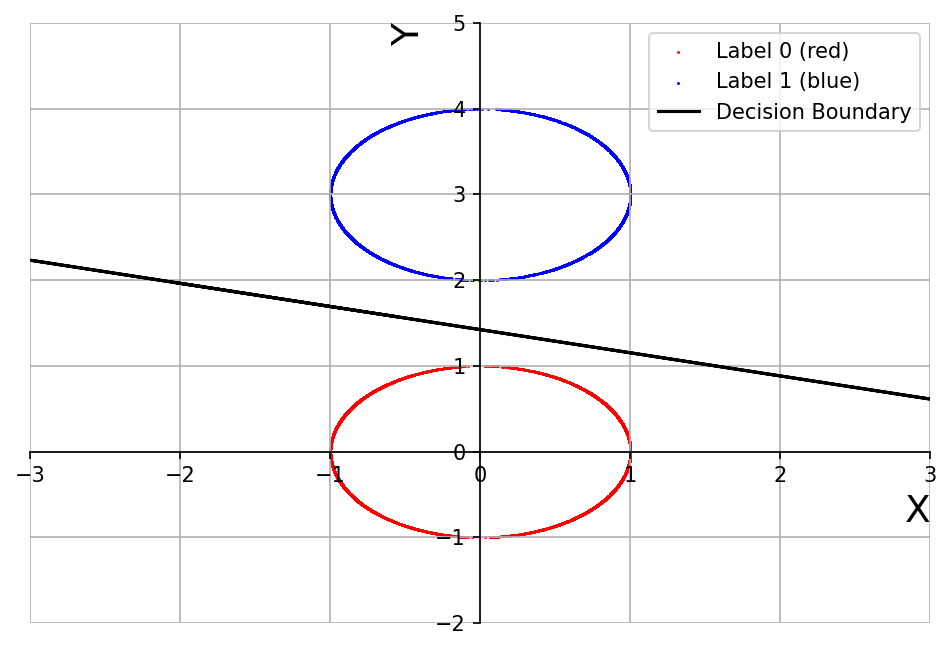

In [13]:
apply_preceptron_on_circle_data(df, partition_size=[80, 20])

Explain why PTA is not applicable in noisy data

Try PTA in greater dimesnion (with more features, by including centers for circle and radius) and we see it will give a decision boundary in greater dimension,
which is not possible in 2-D.
Also the accuracy is 100% with noisy data, in greater dimension.

Accuracy in Prediction of Perceptron Leraning Algorithm: 0.649


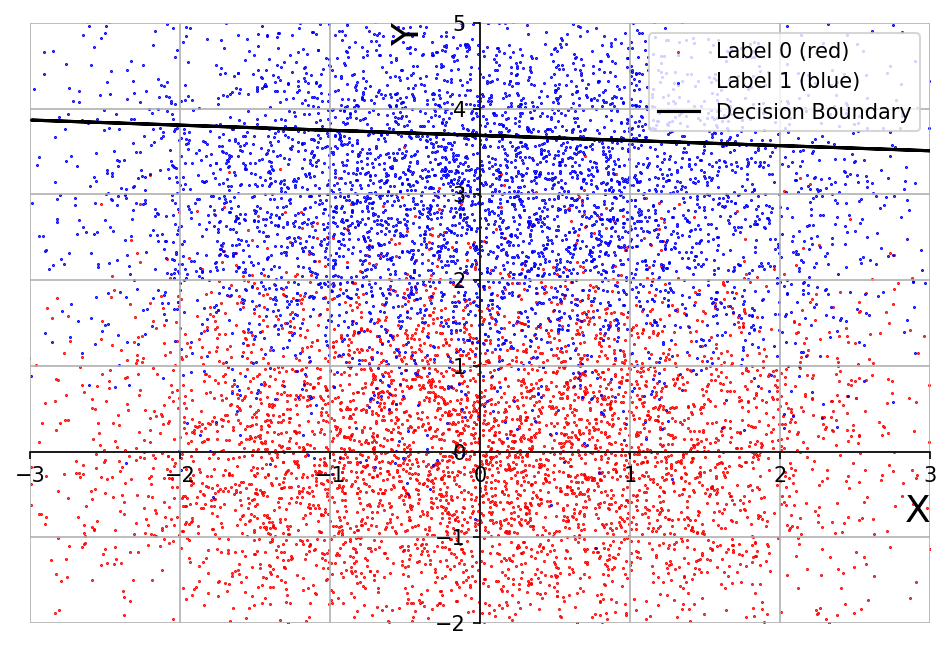

In [14]:
apply_preceptron_on_circle_data(df_noise, partition_size=[80, 20])

# Q2 Part-4

Accuracy in Prediction of Perceptron Leraning Algorithm: 0.739


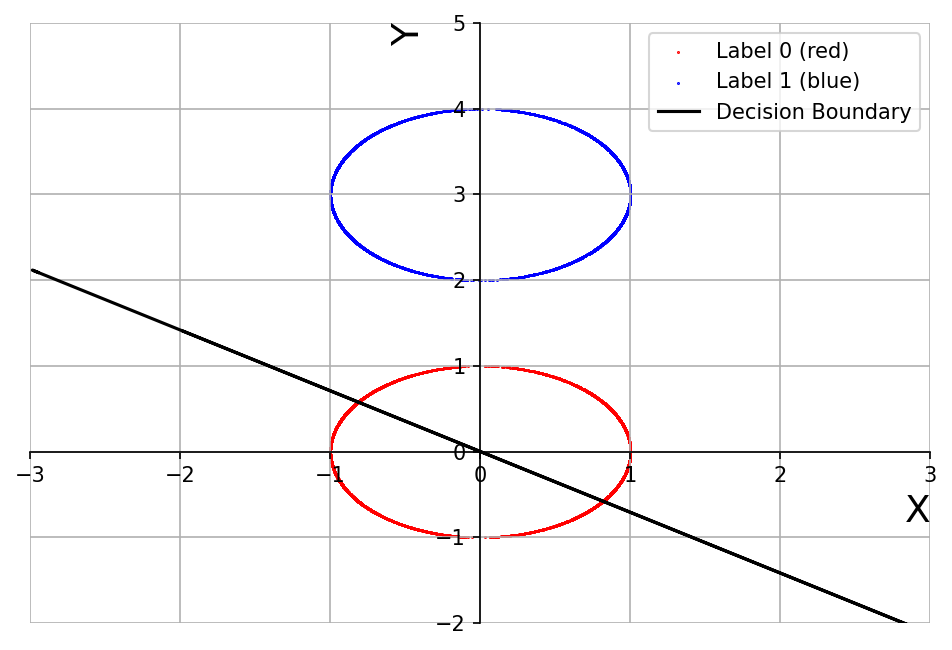

In [15]:
apply_preceptron_on_circle_data(df, with_bias=False, partition_size=[80, 20])

# Q2 Part-5

In [16]:
bit_df = pd.DataFrame(np.array([[0, 0],
                                [0, 1],
                                [1, 0],
                                [1, 1]], dtype=np.int64), columns=['A', 'B'])

In [17]:
AND_df = bit_df.copy()
AND_df['AND'] = AND_df['A'] & AND_df['B']
AND_df

,A,B,AND
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [18]:
OR_df = bit_df.copy()
OR_df['OR'] = OR_df['A'] | OR_df['B']
OR_df

,A,B,OR
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [19]:
XOR_df = bit_df.copy()
XOR_df['XOR'] = XOR_df['A'] ^ XOR_df['B']
XOR_df

,A,B,XOR
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [20]:
def plot_bit_dataset(data:pd.DataFrame, model_weights=[], with_bias=True):
    fig = plt.figure(dpi=100)
    axes = fig.add_axes([0,0,1,1])

    df_bit_output_0 = data[data[data.columns[-1]] == 0]
    df_bit_output_1 = data[data[data.columns[-1]] == 1]

    axes.scatter(df_bit_output_0['A'], df_bit_output_0['B'], c='r', marker='o', label=f"{data.columns[-1]} = 0", s=50);
    axes.scatter(df_bit_output_1['A'], df_bit_output_1['B'], c='b', marker='o', label=f"{data.columns[-1]} = 1", s=50);

    x = np.random.uniform(low=-1,high=3,size=100)
    y = -1
    if with_bias:
        y = (-model_weights[2] - model_weights[0]*x) / model_weights[1]
    else:
        y = -model_weights[0]*x / model_weights[1]
    axes.plot(x,y,color='k',label='Decision Boundary')
    
    axes.grid(True)
    axes.legend()
    axes.set_xlim([-0.5,3])
    axes.set_ylim([-1,3])
    axes.set_xticks(np.arange(0,4))
    axes.set_yticks(np.arange(-1,4))
    axes.set_xlabel('A', fontsize=18)
    axes.set_ylabel('B', fontsize=18)
    plt.show()

In [21]:
def apply_perceptron_on_bit_dataset(dataset, with_bias=True):
    x_train, y_train = split_bit_dataset(dataset, with_bias=with_bias)
    
    perceptron_model = Perceptron()
    perceptron_model.fit(x_train, y_train)

    plot_bit_dataset(dataset, model_weights=perceptron_model.weights, with_bias=with_bias)

Applying PCA on Bit Dataset with Bias as non-zero:


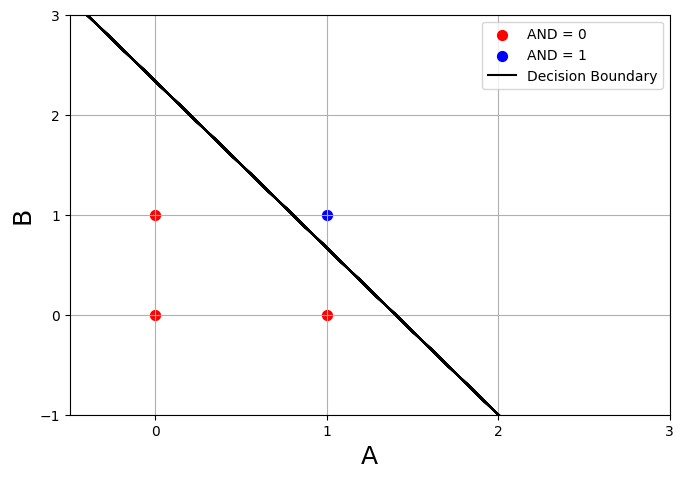

Applying PCA on Bit Dataset with Bias as zero:


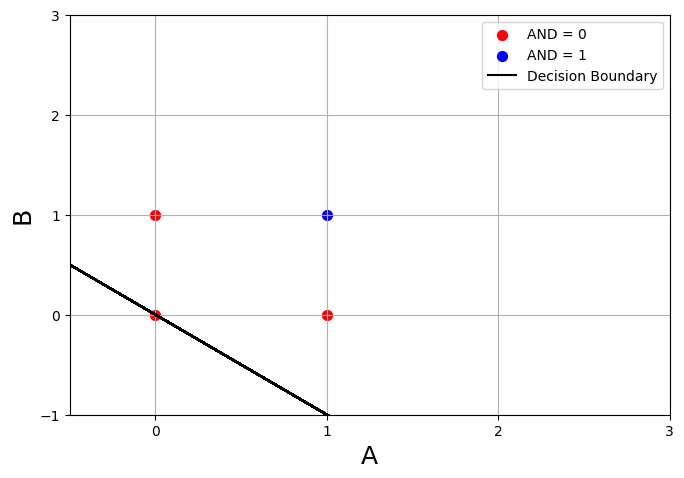

In [22]:
print("Applying PCA on Bit Dataset with Bias as non-zero:")
apply_perceptron_on_bit_dataset(dataset=AND_df)

print("Applying PCA on Bit Dataset with Bias as zero:")
apply_perceptron_on_bit_dataset(dataset=AND_df, with_bias=False)

Applying PCA on Bit Dataset with Bias as non-zero:


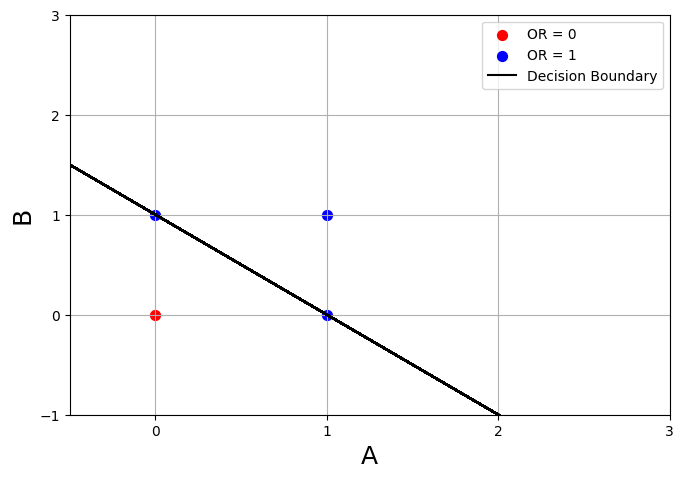

Applying PCA on Bit Dataset with Bias as zero:


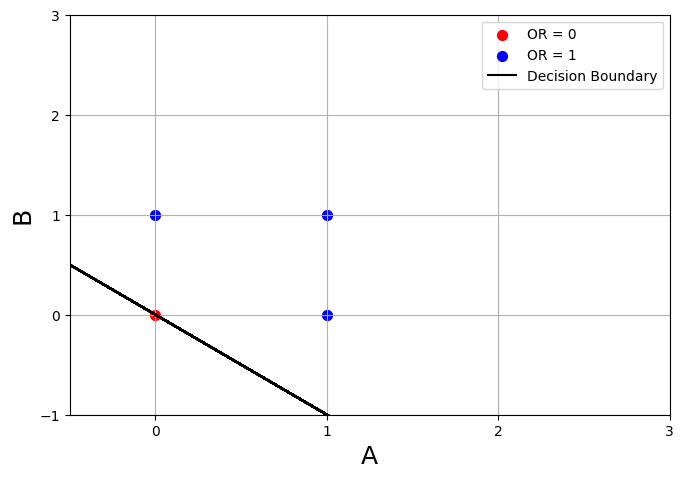

In [23]:
print("Applying PCA on Bit Dataset with Bias as non-zero:")
apply_perceptron_on_bit_dataset(dataset=OR_df)

print("Applying PCA on Bit Dataset with Bias as zero:")
apply_perceptron_on_bit_dataset(dataset=OR_df, with_bias=False)

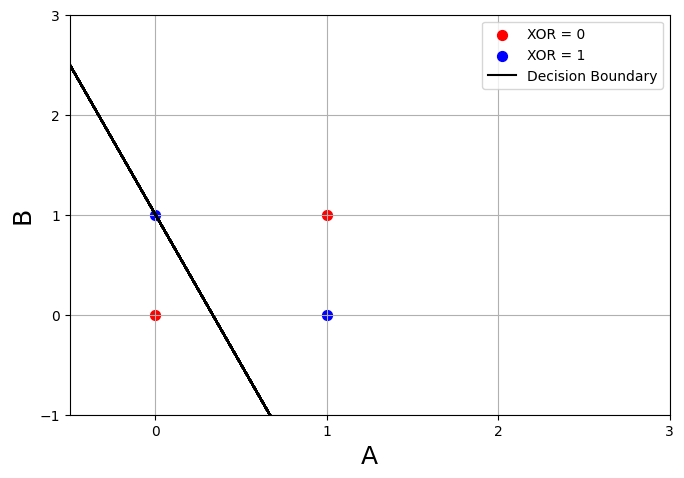

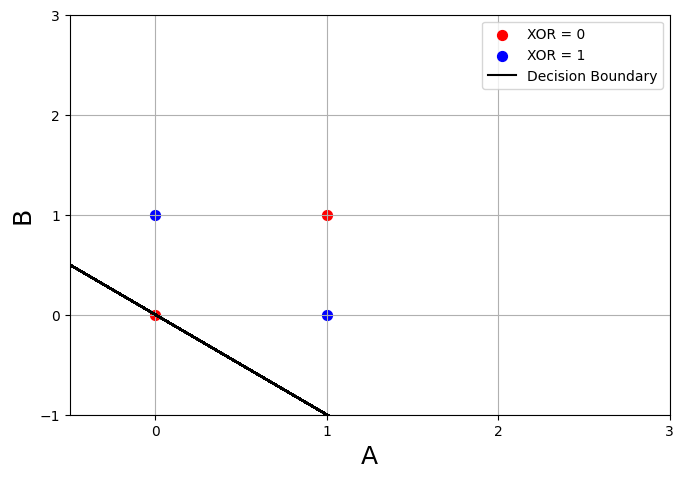

In [24]:
apply_perceptron_on_bit_dataset(dataset=XOR_df)
apply_perceptron_on_bit_dataset(dataset=XOR_df, with_bias=False)